# [Pandas](http://pandas.pydata.org/)

Today we will be exploring the Pandas library. This library is the typically library used in Python to provide data structures and data explortation / munging support.

We will be following along with the [Kaggle titantic tutorial](https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii). You can download the data from [Kaggle](https://www.kaggle.com/c/titanic/data) or from [Canvas](https://utexas.instructure.com/courses/1158710/files/38468516?module_item_id=8026323). We will only be using the train.csv file.

Some additional Pandas docs and links:
1. http://dataconomy.com/14-best-python-pandas-features/
2. http://pandas.pydata.org/pandas-docs/stable/10min.html
3. http://pandas.pydata.org/pandas-docs/stable/tutorials.html
4. http://synesthesiam.com/posts/an-introduction-to-pandas.html
5. http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/

## DataFrames

In [1]:
import numpy as np
import pandas as pd
from __future__ import division
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titantic_train.csv', header=0)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Munging

In [7]:
df['Age'][:10]

0    22
1    38
2    26
3    35
4    35
5   NaN
6    54
7     2
8    27
9    14
Name: Age, dtype: float64

In [8]:
df.Age[:10]

0    22
1    38
2    26
3    35
4    35
5   NaN
6    54
7     2
8    27
9    14
Name: Age, dtype: float64

In [9]:
type(df['Age'])

pandas.core.series.Series

In [10]:
df['Age'].mean()

29.69911764705882

In [11]:
df['Age'].median()

28.0

In [12]:
df[ ['Sex', 'Pclass', 'Age'] ].head()

,Sex,Pclass,Age
0,male,3,22
1,female,1,38
2,female,3,26
3,female,1,35
4,male,3,35


In [13]:
old = df[df['Age'] > 60]
old.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S


In [14]:
old_subset = df[df['Age'] > 60][['Sex', 'Pclass', 'Age', 'Survived']]
old_subset.head()

,Sex,Pclass,Age,Survived
33,male,2,66.0,0
54,male,1,65.0,0
96,male,1,71.0,0
116,male,3,70.5,0
170,male,1,61.0,0


In [15]:
old_subset.shape

(22, 4)

In [16]:
df[df['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


In [17]:
df.groupby('Pclass').Sex.value_counts()

Pclass        
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
dtype: int64

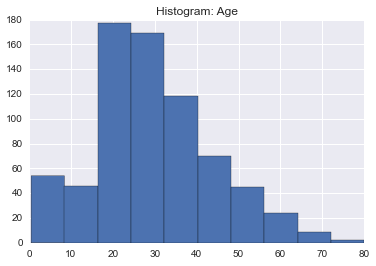

In [18]:
df['Age'].hist()
plt.title("Histogram: Age")
sns.despine()

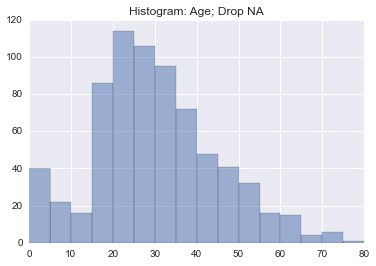

In [19]:
df['Age'].dropna().hist(bins=16, range=(0,80), alpha = .5)
plt.title("Histogram: Age; Drop NA")
sns.despine()

## Cleaning Data

In [20]:
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [21]:
df['Gender'] = 4
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,4


In [22]:
df['Gender'] = df['Sex'].map( lambda x: x[0].upper() )
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,F
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,F


In [23]:
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [24]:
df.Embarked.value_counts()

S    644
C    168
Q     77
dtype: int64

In [25]:
embarked_dummies = pd.get_dummies(df.Embarked, prefix="embarked")
embarked_dummies.head()

,embarked_C,embarked_Q,embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [26]:
df = df.join(embarked_dummies)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,embarked_C,embarked_Q,embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,0,0,1


In [27]:
del df['Embarked']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Gender,embarked_C,embarked_Q,embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,1,0,0,1


## Age Fill

In [28]:
df.groupby(['Pclass', 'Gender']).Age.median()

Pclass  Gender
1       0         35.0
        1         40.0
2       0         28.0
        1         30.0
3       0         21.5
        1         25.0
Name: Age, dtype: float64

In [29]:
med = df.groupby(['Pclass', 'Gender']).Age.transform('median')
df['AgeFilled'] = df.Age.fillna(med)
df[df['Age'].isnull()][['Gender','Pclass','Age','AgeFilled']].head(10)

,Gender,Pclass,Age,AgeFilled
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


In [30]:
df['AgeIsNull'] = pd.isnull(df.Age).astype(int)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,embarked_C,embarked_Q,embarked_S,AgeFilled,AgeIsNull
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783,29.112424,0.198653
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876,13.304424,0.399210
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,21.500000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000,26.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000,36.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,80.000000,1.000000


In [34]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Gender,embarked_C,embarked_Q,embarked_S,AgeFilled,AgeIsNull,FamilySize,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,1,0,0,1,22,0,1,66
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,0,1,0,0,38,0,1,38
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1,26,0,0,78
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,0,0,0,1,35,0,1,35
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,1,0,0,1,35,0,0,105


## Feature Engineering

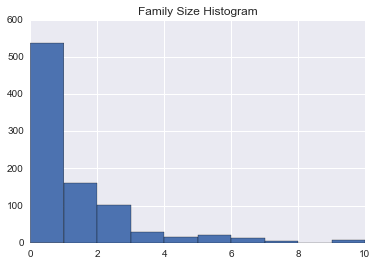

In [31]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df['Age*Class'] = df.AgeFilled * df.Pclass
df['FamilySize'].hist()
plt.title("Family Size Histogram")
sns.despine()

In [32]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Gender           int64
embarked_C     float64
embarked_Q     float64
embarked_S     float64
AgeFilled      float64
AgeIsNull        int64
FamilySize       int64
Age*Class      float64
dtype: object

In [33]:
df.dtypes[df.dtypes.map(lambda x: x=='object')]

Name      object
Sex       object
Ticket    object
Cabin     object
dtype: object

In [35]:
df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Age'], axis=1)
df = df.dropna()
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Gender,embarked_C,embarked_Q,embarked_S,AgeFilled,AgeIsNull,FamilySize,Age*Class
0,1,0,3,1,0,7.2500,1,0,0,1,22,0,1,66
1,2,1,1,1,0,71.2833,0,1,0,0,38,0,1,38
2,3,1,3,0,0,7.9250,0,0,0,1,26,0,0,78
3,4,1,1,1,0,53.1000,0,0,0,1,35,0,1,35
4,5,0,3,0,0,8.0500,1,0,0,1,35,0,0,105
